In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Create a connection object which will connect us to the database and will let us execute the SQL statements
db = r'C:\Users\Rajashri\Desktop\Projects\IMDB SQLite\movie.sqlite\movie.sqlite'

con = sqlite3.connect(db)
cur = con.cursor()

### Get the 'movies' data

In [3]:
# use the cursor object to call the execute() method to execute SQL queries
cur.execute('SELECT * FROM movies')

# fetchall() --> fetch all rows for the current query, if no rows avaliable then it returns an empty list
movies = cur.fetchall()

# Creating a dataframe
movies = pd.DataFrame(movies, columns = ['id', 'original_title', 'budget', 'popularity', 'release_date', 'revenue', 'title', 
                                         'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id'])
print(movies.shape)
movies.head(5)

(4773, 13)


,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


### Get the 'directors' data

In [5]:
cur.execute('SELECT * FROM directors')
directors = cur.fetchall()

directors = pd.DataFrame(directors, columns = ['name', 'id', 'gender', 'uid', 'department'])
print(directors.shape)
directors.head(5)

(2349, 5)


,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


In [6]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


#### How many movies are present in IMDb?

In [7]:
cur.execute('SELECT COUNT (*) from movies')
count = cur.fetchall()

print("The number of movies present in IMDB: ", count[0])

The number of movies present in IMDB:  (4773,)


#### Find these 3 directors: James Cameron, Luc Besson, John Woo

In [8]:
cur.execute("SELECT * from directors where name == 'James Cameron' or name == 'Luc Besson' or name == 'John Woo'")
get_directors = cur.fetchall()

get_directors = pd.DataFrame(get_directors, columns = ['name', 'id', 'gender', 'uid', 'department'])
get_directors

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,John Woo,4893,2,11401,Directing
2,Luc Besson,4949,2,59,Directing


#### Find all directors with name starting with Steven. 

In [9]:
cur.execute("SELECT id, name from directors where name LIKE 'Steven%'")
name_like = cur.fetchall()

name_like = pd.DataFrame(name_like, columns = ['id', 'director_name'])
name_like

,id,director_name
0,4799,Steven Spielberg
1,4909,Steven Soderbergh
2,5013,Steven Brill
3,5117,Steven Zaillian
4,5216,Steven Quale
5,5221,Steven Seagal
6,5390,Steven E. de Souza
7,5803,Steven Shainberg
8,6713,Steven R. Monroe


#### Get the count of female directors.

In [10]:
cur.execute(" SELECT COUNT(*) from directors where gender == 1")
female_directors = cur.fetchall()

print("The number of femail directors are: ", female_directors[0])

The number of femail directors are:  (150,)


#### Find the name of the 10th first women director.

In [11]:
cur.execute("SELECT name FROM directors WHERE gender == 1 ORDER by id asc limit 1 OFFSET 10")
tenth= cur.fetchall()

print("The name of the 10th first women director is: ", tenth[0])

The name of the 10th first women director is:  ('Karyn Kusama',)


#### Budget Analysis: What are the 10 most expensive movies?

In [12]:
# JOIN movies and directors data
cur.execute("SELECT original_title, name, release_date, budget FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY budget DESC")
mostExpensive = cur.fetchall()

mostExpensive = pd.DataFrame(mostExpensive, columns = ['movie_name', 'director_name', 'release_date', 'budget']).head(10)
mostExpensive

,movie_name,director_name,release_date,budget
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,2011-05-14,380000000
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007-05-19,300000000
2,Avengers: Age of Ultron,Joss Whedon,2015-04-22,280000000
3,Superman Returns,Bryan Singer,2006-06-28,270000000
4,John Carter,Andrew Stanton,2012-03-07,260000000
5,Tangled,Byron Howard,2010-11-24,260000000
6,Spider-Man 3,Sam Raimi,2007-05-01,258000000
7,The Lone Ranger,Gore Verbinski,2013-07-03,255000000
8,The Dark Knight Rises,Christopher Nolan,2012-07-16,250000000
9,Harry Potter and the Half-Blood Prince,David Yates,2009-07-07,250000000


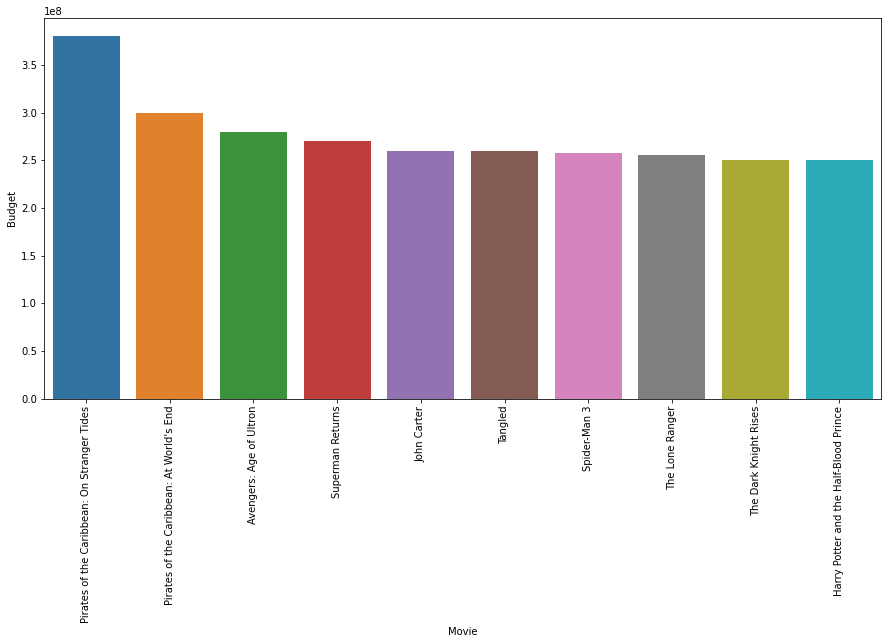

In [13]:
# let's visualize the top 10 most expensive movies
plt.figure(figsize=(15,7))
sns.barplot(x=mostExpensive['movie_name'], y=mostExpensive['budget'])
plt.xlabel('Movie')
plt.ylabel('Budget')
plt.xticks(rotation='vertical')
plt.show()

#### Profit Analysis: What are the 10 highest grossing movies?

In [14]:
# JOIN movies and directors data
cur.execute('SELECT original_title, name, release_date, revenue FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY revenue DESC')
mostProfitable = cur.fetchall()

mostProfitable = pd.DataFrame(mostProfitable, columns = ['movie_name', 'director_name', 'release_date', 'revenue']).head(10)
mostProfitable

,movie_name,director_name,release_date,revenue
0,Avatar,James Cameron,2009-12-10,2787965087
1,Titanic,James Cameron,1997-11-18,1845034188
2,The Avengers,Joss Whedon,2012-04-25,1519557910
3,Jurassic World,Colin Trevorrow,2015-06-09,1513528810
4,Furious 7,James Wan,2015-04-01,1506249360
5,Avengers: Age of Ultron,Joss Whedon,2015-04-22,1405403694
6,Frozen,Chris Buck,2013-11-27,1274219009
7,Iron Man 3,Shane Black,2013-04-18,1215439994
8,Minions,Kyle Balda,2015-06-17,1156730962
9,Captain America: Civil War,Anthony Russo,2016-04-27,1153304495


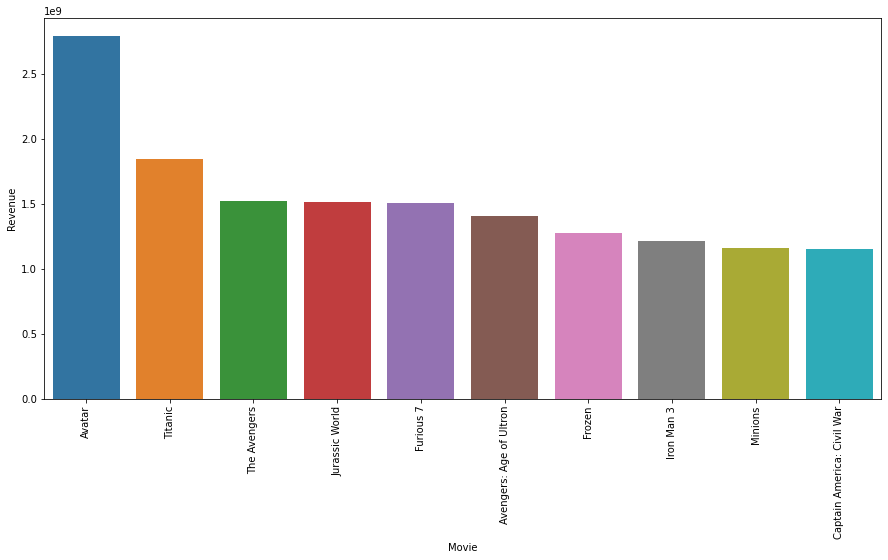

In [15]:
# let's visualize the top 10 most profitable movies
plt.figure(figsize=(15,7))
sns.barplot(x=mostProfitable['movie_name'], y=mostProfitable['revenue'])
plt.xlabel('Movie')
plt.ylabel('Revenue')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
# It can be seen that James Cameron made 2 movies to fill the top rankings
cur.execute('SELECT original_title, release_date, budget, revenue, popularity, vote_average FROM directors JOIN movies ON directors.id = movies.director_id WHERE name = "James Cameron" ORDER BY revenue DESC')
moviesByJamesCameron = cur.fetchall()

moviesByJamesCameron = pd.DataFrame(moviesByJamesCameron, columns = ['movie_name', 'release_date', 'budget', 'revenue', 'popularity', 'vote_average'])
moviesByJamesCameron

,movie_name,release_date,budget,revenue,popularity,vote_average
0,Avatar,2009-12-10,237000000,2787965087,150,7.2
1,Titanic,1997-11-18,200000000,1845034188,100,7.5
2,Terminator 2: Judgment Day,1991-07-01,100000000,520000000,101,7.7
3,True Lies,1994-07-14,115000000,378882411,38,6.8
4,Aliens,1986-07-18,18500000,183316455,67,7.7
5,The Abyss,1989-08-09,70000000,90000098,24,7.1
6,The Terminator,1984-10-26,6400000,78371200,74,7.3


#### Popularity Analysis: What are the 10 most popular movies?

In [17]:
# JOIN movies and directors data
cur.execute('SELECT original_title, name, release_date, popularity FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY popularity DESC')
mostPopular = cur.fetchall()

mostPopular = pd.DataFrame(mostPopular, columns = ['movie_name', 'director_name', 'release_date', 'popularity']).head(10)
mostPopular

,movie_name,director_name,release_date,popularity
0,Minions,Kyle Balda,2015-06-17,875
1,Interstellar,Christopher Nolan,2014-11-05,724
2,Deadpool,Tim Miller,2016-02-09,514
3,Guardians of the Galaxy,James Gunn,2014-07-30,481
4,Mad Max: Fury Road,George Miller,2015-05-13,434
5,Jurassic World,Colin Trevorrow,2015-06-09,418
6,Pirates of the Caribbean: The Curse of the Bla...,Gore Verbinski,2003-07-09,271
7,Dawn of the Planet of the Apes,Matt Reeves,2014-06-26,243
8,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,2014-11-18,206
9,Big Hero 6,Chris Williams,2014-10-24,203


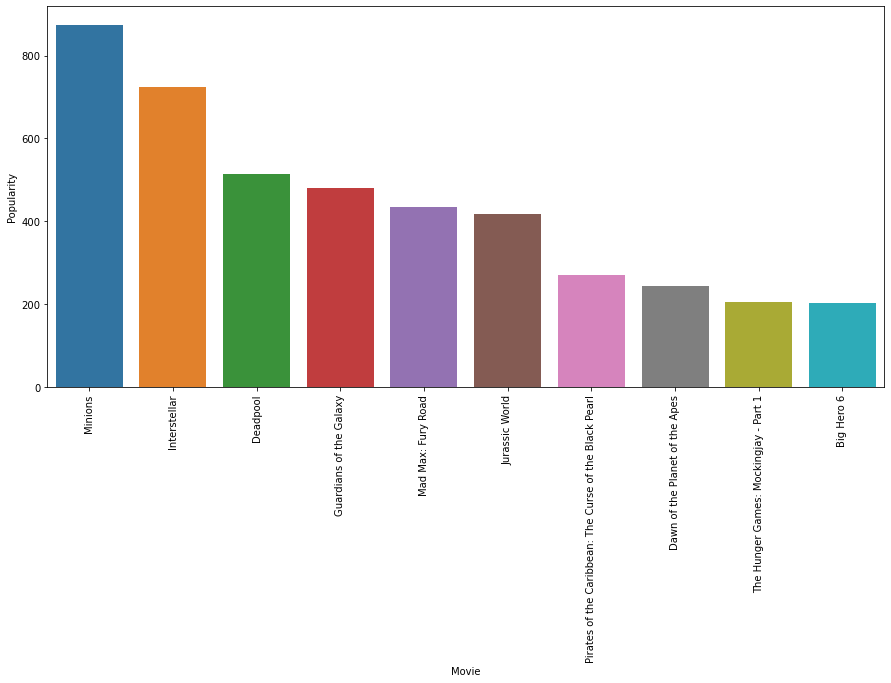

In [18]:
# let's visualize the top 10 most popular movies
plt.figure(figsize=(15,7))
sns.barplot(x=mostPopular['movie_name'], y=mostPopular['popularity'])
plt.xlabel('Movie')
plt.ylabel('Popularity')
plt.xticks(rotation='vertical')
plt.show()

#### Voting Analysis: Which 10 movies have the highest vote?

In [19]:
cur.execute('SELECT original_title, name, release_date, vote_average, vote_count FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY vote_average DESC')
bestVote = cur.fetchall()

bestVote = pd.DataFrame(bestVote, columns = ['movie_name', 'director_name', 'release_date',  'vote_average', 'vote_count']).head(10)
bestVote

,movie_name,director_name,release_date,vote_average,vote_count
0,Stiff Upper Lips,Gary Sinyor,1998-06-12,10.0,1
1,"Dancer, Texas Pop. 81",Tim McCanlies,1998-05-01,10.0,1
2,Sardaarji,Rohit Jugraj,2015-06-26,9.5,2
3,One Man's Hero,Lance Hool,1999-08-02,9.3,2
4,The Shawshank Redemption,Frank Darabont,1994-09-23,8.5,8205
5,There Goes My Baby,Floyd Mutrux,1994-09-02,8.5,2
6,The Prisoner of Zenda,John Cromwell,1937-09-03,8.4,11
7,The Godfather,Francis Ford Coppola,1972-03-14,8.4,5893
8,Fight Club,David Fincher,1999-10-15,8.3,9413
9,Schindler's List,Steven Spielberg,1993-11-29,8.3,4329


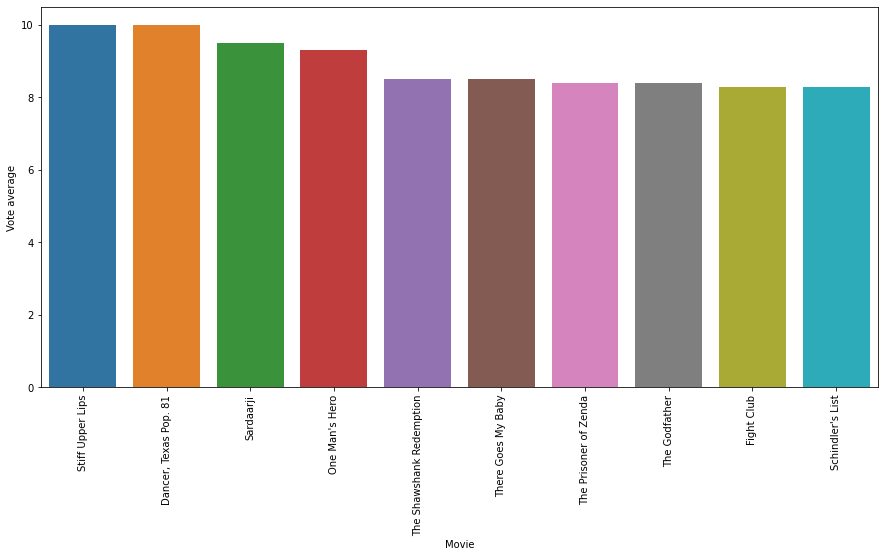

In [20]:
# let's visualize the top 10 movies with the highest votes
plt.figure(figsize=(15,7))
sns.barplot(x=bestVote['movie_name'], y=bestVote['vote_average'])
plt.xlabel('Movie')
plt.ylabel('Vote average')
plt.xticks(rotation='vertical')
plt.show()

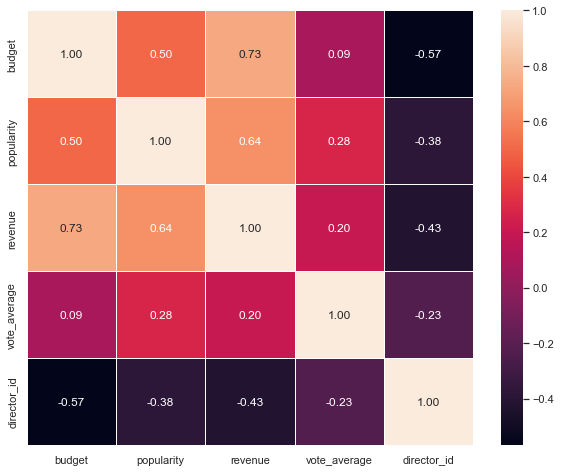

In [21]:
# However, there are anomalies, i.e., 2 movies were only voted by 1 person. So, it is likely to affect the assessment results
# Let's plot a heatmap of correlation
sns.set(rc = {'figure.figsize': (10, 8)})
sns.heatmap(movies[['budget', 'popularity', 'revenue', 'vote_average', 'director_id']].corr(), 
            annot = True, fmt = '.2f', linewidth = 1);

In [22]:
# The Heat Map graph shows the effect between one variable to the other variables
# From the graph, it is clear that 'budget' has the greatest impact on revenue with 0.73
# 'popularity' has quite the impact on revenue
# 'director_id' also has a correlation with revenue, even though it is small
# However, 'vote_average' has a very very small correlation with revenue

#### What is the most average vote awarded movie since 2000?

In [23]:
# most average vote awarded movie since January 1st, 2000
cur.execute("SELECT original_title, release_date, vote_average, vote_count FROM movies WHERE release_date > '2000-01-01' ORDER by vote_average DESC LIMIT 1;")
most_awarded_avg = cur.fetchall()

most_awarded_avg = pd.DataFrame(most_awarded_avg, columns = ['movie_name', 'release_date', 'vote_average', 'vote_count'])
most_awarded_avg

,movie_name,release_date,vote_average,vote_count
0,Sardaarji,2015-06-26,9.5,2


#### Which 10 directors have made the most number of movies?

In [24]:
cur.execute('SELECT name, COUNT(original_title), SUM(revenue) FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY name ORDER BY COUNT(original_title) DESC')
mostProductiveDirector = cur.fetchall()

mostProductiveDirector = pd.DataFrame(mostProductiveDirector, columns = ['director_name', 'movies', 'revenue']).head(10)
mostProductiveDirector

,director_name,movies,revenue
0,Steven Spielberg,27,9147393164
1,Woody Allen,21,669101038
2,Martin Scorsese,20,1956635998
3,Clint Eastwood,20,2512058888
4,Spike Lee,16,340618771
5,Robert Rodriguez,16,1109899581
6,Ridley Scott,16,3189557997
7,Steven Soderbergh,15,2114864443
8,Renny Harlin,15,1031500590
9,Tim Burton,14,3337418241


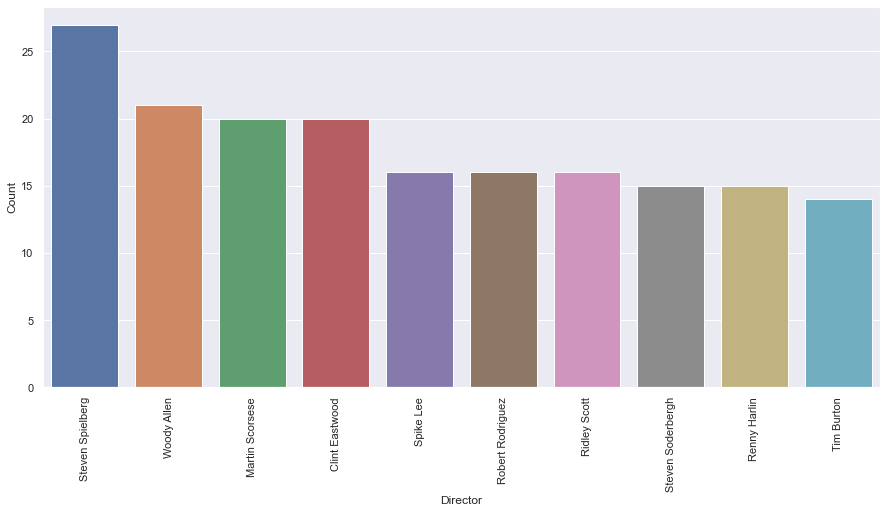

In [25]:
# let's visualize the directors who have made the most number of movies
plt.figure(figsize=(15,7))
sns.barplot(x=mostProductiveDirector['director_name'], y=mostProductiveDirector['movies'])
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

#### Which 10 directors have made the highest gross profit?

In [26]:
cur.execute('SELECT name, COUNT(original_title), SUM(revenue) FROM directors JOIN movies ON directors.id = movies.director_id GROUP BY name ORDER BY SUM(revenue) DESC')
mostProfitableDirector = cur.fetchall()

mostProfitableDirector = pd.DataFrame(mostProfitableDirector, columns = ['director_name', 'movies', 'revenue']).head(10)
mostProfitableDirector

,director_name,movies,revenue
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234
5,Chris Columbus,11,3725631503
6,Robert Zemeckis,13,3590622002
7,George Lucas,5,3339113893
8,Tim Burton,14,3337418241
9,Ridley Scott,16,3189557997


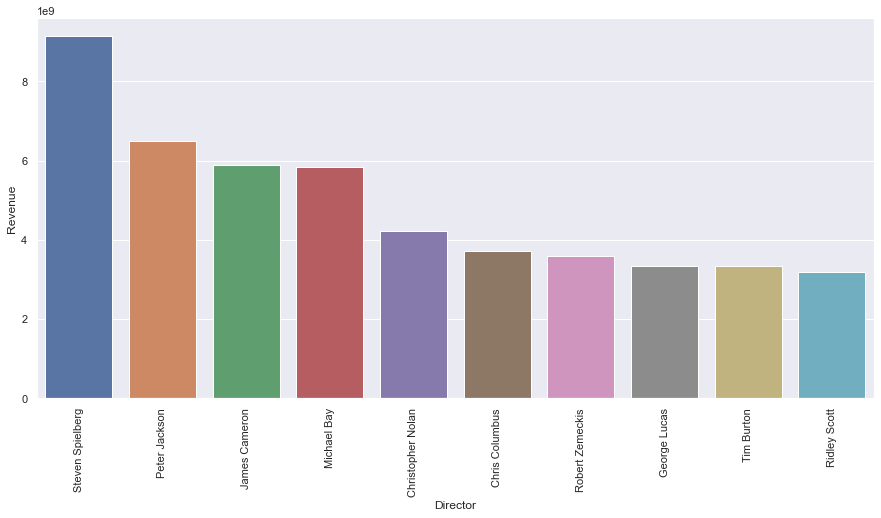

In [27]:
# let's visualize the directors who have made the highest profit
plt.figure(figsize=(15,7))
sns.barplot(x=mostProfitableDirector['director_name'], y=mostProfitableDirector['revenue'])
plt.xlabel('Director')
plt.ylabel('Revenue')
plt.xticks(rotation='vertical')
plt.show()

In [28]:
# Steven Spielberg have made the highest profit, so let's list the Steven Spielberg movies
cur.execute('SELECT original_title, release_date, budget, revenue, popularity, vote_average FROM directors JOIN movies ON directors.id = movies.director_id WHERE name = "Steven Spielberg" ORDER BY revenue DESC')
moviesByStevenSpielberg = cur.fetchall()

moviesByStevenSpielberg = pd.DataFrame(moviesByStevenSpielberg, columns = ['movie_name', 'release_date', 'budget', 'revenue', 'popularity', 'vote_average'])
moviesByStevenSpielberg

,movie_name,release_date,budget,revenue,popularity,vote_average
0,Jurassic Park,1993-06-11,63000000,920100000,40,7.6
1,E.T. the Extra-Terrestrial,1982-04-03,10500000,792910554,56,7.3
2,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,185000000,786636033,75,5.7
3,War of the Worlds,2005-06-28,132000000,591739379,48,6.2
4,Saving Private Ryan,1998-07-24,70000000,481840909,76,7.9
5,Indiana Jones and the Last Crusade,1989-05-24,48000000,474171806,80,7.6
6,Jaws,1975-06-18,7000000,470654000,50,7.5
7,Raiders of the Lost Ark,1981-06-12,18000000,389925971,68,7.7
8,The Adventures of Tintin,2011-10-25,130000000,371940071,89,6.7
9,Minority Report,2002-06-20,102000000,358372926,65,7.1
